In [1]:
import os
import matplotlib.pyplot as plt

In [1]:
from get_algos import get_applicable_algos, run_env, run_experiment

In [3]:
import gym
from gym.wrappers import Monitor

In [4]:
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

In [5]:
def create_paths(algo_name,env_name):
    log_path=os.path.join(env_name, algo_name,"logs")
    if not os.path.exists(log_path):
        os.makedirs(log_path)
    render_path=os.path.join(env_name, algo_name,"render")
    if not os.path.exists(render_path):
        os.makedirs(render_path)
    model_path=os.path.join(env_name, algo_name)
    if not os.path.exists(model_path):
        os.makedirs(model_path)
    return(log_path, render_path, model_path)

In [6]:
env_name='CartPole-v0'
env=gym.make(env_name)
env=DummyVecEnv([lambda:env])

In [7]:
action_space_type=str(type(env.action_space)).split('.')[3].split("'")[0] #Parsing the action_space variable to get the exact type - Discrete, Box, etc.

In [8]:
algos=get_applicable_algos(action_space_type) #Gets all algos that apply for a specific type of action_space
algos

['PPO', 'A2C', 'DQN']

In [9]:
from stable_baselines3 import DQN, PPO ,A2C, DDPG, DQN, SAC, TD3

### Training

In [10]:
def train_algo(algo_name,env,logpath,timesteps=40000,nn_type='MlpPolicy'):
    model=eval(algo_name)(nn_type, env, verbose=1,tensorboard_log=logpath)
    model.learn(total_timesteps=timesteps)
    return model

In [11]:
def train(algo_name, env_name,env,log_path,model_path): 
    model=train_algo(algo_name,env,log_path)
    model.save(model_path)
    env.close()
    return model

In [12]:
for algo_name in algos:
    log_path,render_path,model_path=create_paths(algo_name, env_name)
    env_name='CartPole-v0'
    env=gym.make(env_name)
    env=DummyVecEnv([lambda:env])
    print('********',algo_name,'********')
    model=train(algo_name, env_name,env,log_path,os.path.join(model_path,"model"))
    env.close()

******** PPO ********
Using cpu device
Logging to CartPole-v0\PPO\logs\PPO_1
-----------------------------
| time/              |      |
|    fps             | 2365 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1511        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008206999 |
|    clip_fraction        | 0.0849      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.687      |
|    explained_variance   | -0.00171    |
|    learning_rate        | 0.0003      |
|    loss                 | 7.73        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0129     |
|    value_loss           | 49.9        |

------------------------------------------
| time/                   |              |
|    fps                  | 1100         |
|    iterations           | 13           |
|    time_elapsed         | 24           |
|    total_timesteps      | 26624        |
| train/                  |              |
|    approx_kl            | 0.0021168236 |
|    clip_fraction        | 0.0122       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.544       |
|    explained_variance   | 0.145        |
|    learning_rate        | 0.0003       |
|    loss                 | 18.1         |
|    n_updates            | 120          |
|    policy_gradient_loss | -0.00136     |
|    value_loss           | 25.1         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1101         |
|    iterations           | 14           |
|    time_elapsed         | 26           |
|    total_

------------------------------------
| time/                 |          |
|    fps                | 1124     |
|    iterations         | 500      |
|    time_elapsed       | 2        |
|    total_timesteps    | 2500     |
| train/                |          |
|    entropy_loss       | -0.649   |
|    explained_variance | -0.00509 |
|    learning_rate      | 0.0007   |
|    n_updates          | 499      |
|    policy_loss        | 0.991    |
|    value_loss         | 4.97     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1117     |
|    iterations         | 600      |
|    time_elapsed       | 2        |
|    total_timesteps    | 3000     |
| train/                |          |
|    entropy_loss       | -0.494   |
|    explained_variance | 0.00808  |
|    learning_rate      | 0.0007   |
|    n_updates          | 599      |
|    policy_loss        | 1.26     |
|    value_loss         | 4.32     |
-

------------------------------------
| time/                 |          |
|    fps                | 1068     |
|    iterations         | 2100     |
|    time_elapsed       | 9        |
|    total_timesteps    | 10500    |
| train/                |          |
|    entropy_loss       | -0.639   |
|    explained_variance | 0.00012  |
|    learning_rate      | 0.0007   |
|    n_updates          | 2099     |
|    policy_loss        | 0.0174   |
|    value_loss         | 0.00183  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1066     |
|    iterations         | 2200     |
|    time_elapsed       | 10       |
|    total_timesteps    | 11000    |
| train/                |          |
|    entropy_loss       | -0.612   |
|    explained_variance | 0.00178  |
|    learning_rate      | 0.0007   |
|    n_updates          | 2199     |
|    policy_loss        | 0.0021   |
|    value_loss         | 3.29e-05 |
-

------------------------------------
| time/                 |          |
|    fps                | 1095     |
|    iterations         | 3700     |
|    time_elapsed       | 16       |
|    total_timesteps    | 18500    |
| train/                |          |
|    entropy_loss       | -0.582   |
|    explained_variance | -1.62    |
|    learning_rate      | 0.0007   |
|    n_updates          | 3699     |
|    policy_loss        | 0.00107  |
|    value_loss         | 9.78e-06 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1097     |
|    iterations         | 3800     |
|    time_elapsed       | 17       |
|    total_timesteps    | 19000    |
| train/                |          |
|    entropy_loss       | -0.547   |
|    explained_variance | 0.311    |
|    learning_rate      | 0.0007   |
|    n_updates          | 3799     |
|    policy_loss        | -0.0222  |
|    value_loss         | 0.00305  |
-

-------------------------------------
| time/                 |           |
|    fps                | 1116      |
|    iterations         | 5300      |
|    time_elapsed       | 23        |
|    total_timesteps    | 26500     |
| train/                |           |
|    entropy_loss       | -0.105    |
|    explained_variance | -0.000566 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5299      |
|    policy_loss        | -0.693    |
|    value_loss         | 1.88e+03  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1116     |
|    iterations         | 5400     |
|    time_elapsed       | 24       |
|    total_timesteps    | 27000    |
| train/                |          |
|    entropy_loss       | -0.109   |
|    explained_variance | -0.0365  |
|    learning_rate      | 0.0007   |
|    n_updates          | 5399     |
|    policy_loss        | 0.0863   |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 1130     |
|    iterations         | 6900     |
|    time_elapsed       | 30       |
|    total_timesteps    | 34500    |
| train/                |          |
|    entropy_loss       | -0.535   |
|    explained_variance | -11.6    |
|    learning_rate      | 0.0007   |
|    n_updates          | 6899     |
|    policy_loss        | 0.000206 |
|    value_loss         | 3.41e-07 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1130     |
|    iterations         | 7000     |
|    time_elapsed       | 30       |
|    total_timesteps    | 35000    |
| train/                |          |
|    entropy_loss       | -0.402   |
|    explained_variance | -34.2    |
|    learning_rate      | 0.0007   |
|    n_updates          | 6999     |
|    policy_loss        | -0.00105 |
|    value_loss         | 1.09e-06 |
-

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.86     |
| time/               |          |
|    episodes         | 28       |
|    fps              | 11258    |
|    time_elapsed     | 0        |
|    total_timesteps  | 590      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.827    |
| time/               |          |
|    episodes         | 32       |
|    fps              | 11518    |
|    time_elapsed     | 0        |
|    total_timesteps  | 729      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.807    |
| time/               |          |
|    episodes         | 36       |
|    fps              | 11559    |
|    time_elapsed     | 0        |
|    total_timesteps  | 812      |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.275    |
| time/               |          |
|    episodes         | 136      |
|    fps              | 11644    |
|    time_elapsed     | 0        |
|    total_timesteps  | 3053     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.261    |
| time/               |          |
|    episodes         | 140      |
|    fps              | 11626    |
|    time_elapsed     | 0        |
|    total_timesteps  | 3110     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.239    |
| time/               |          |
|    episodes         | 144      |
|    fps              | 11652    |
|    time_elapsed     | 0        |
|    total_timesteps  | 3204     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 244      |
|    fps              | 11632    |
|    time_elapsed     | 0        |
|    total_timesteps  | 5243     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 248      |
|    fps              | 11599    |
|    time_elapsed     | 0        |
|    total_timesteps  | 5309     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 252      |
|    fps              | 11613    |
|    time_elapsed     | 0        |
|    total_timesteps  | 5385     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 352      |
|    fps              | 11551    |
|    time_elapsed     | 0        |
|    total_timesteps  | 7673     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 356      |
|    fps              | 11546    |
|    time_elapsed     | 0        |
|    total_timesteps  | 7735     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 360      |
|    fps              | 11531    |
|    time_elapsed     | 0        |
|    total_timesteps  | 7808     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 460      |
|    fps              | 11445    |
|    time_elapsed     | 0        |
|    total_timesteps  | 9882     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 464      |
|    fps              | 11447    |
|    time_elapsed     | 0        |
|    total_timesteps  | 9975     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 468      |
|    fps              | 11436    |
|    time_elapsed     | 0        |
|    total_timesteps  | 10102    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 568      |
|    fps              | 11372    |
|    time_elapsed     | 1        |
|    total_timesteps  | 12294    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 572      |
|    fps              | 11372    |
|    time_elapsed     | 1        |
|    total_timesteps  | 12363    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 576      |
|    fps              | 11383    |
|    time_elapsed     | 1        |
|    total_timesteps  | 12488    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 676      |
|    fps              | 11325    |
|    time_elapsed     | 1        |
|    total_timesteps  | 14686    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 680      |
|    fps              | 11332    |
|    time_elapsed     | 1        |
|    total_timesteps  | 14808    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 684      |
|    fps              | 11326    |
|    time_elapsed     | 1        |
|    total_timesteps  | 14869    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 784      |
|    fps              | 11355    |
|    time_elapsed     | 1        |
|    total_timesteps  | 17081    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 788      |
|    fps              | 11362    |
|    time_elapsed     | 1        |
|    total_timesteps  | 17219    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 792      |
|    fps              | 11363    |
|    time_elapsed     | 1        |
|    total_timesteps  | 17300    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 892      |
|    fps              | 11371    |
|    time_elapsed     | 1        |
|    total_timesteps  | 19586    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 896      |
|    fps              | 11377    |
|    time_elapsed     | 1        |
|    total_timesteps  | 19744    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 900      |
|    fps              | 11384    |
|    time_elapsed     | 1        |
|    total_timesteps  | 19863    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1000     |
|    fps              | 11395    |
|    time_elapsed     | 1        |
|    total_timesteps  | 22140    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1004     |
|    fps              | 11397    |
|    time_elapsed     | 1        |
|    total_timesteps  | 22211    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1008     |
|    fps              | 11400    |
|    time_elapsed     | 1        |
|    total_timesteps  | 22365    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1108     |
|    fps              | 11399    |
|    time_elapsed     | 2        |
|    total_timesteps  | 24541    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1112     |
|    fps              | 11404    |
|    time_elapsed     | 2        |
|    total_timesteps  | 24620    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1116     |
|    fps              | 11402    |
|    time_elapsed     | 2        |
|    total_timesteps  | 24707    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1216     |
|    fps              | 11422    |
|    time_elapsed     | 2        |
|    total_timesteps  | 27109    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1220     |
|    fps              | 11425    |
|    time_elapsed     | 2        |
|    total_timesteps  | 27196    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1224     |
|    fps              | 11424    |
|    time_elapsed     | 2        |
|    total_timesteps  | 27315    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1324     |
|    fps              | 11429    |
|    time_elapsed     | 2        |
|    total_timesteps  | 29503    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1328     |
|    fps              | 11428    |
|    time_elapsed     | 2        |
|    total_timesteps  | 29583    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1332     |
|    fps              | 11431    |
|    time_elapsed     | 2        |
|    total_timesteps  | 29709    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1432     |
|    fps              | 11443    |
|    time_elapsed     | 2        |
|    total_timesteps  | 32189    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1436     |
|    fps              | 11445    |
|    time_elapsed     | 2        |
|    total_timesteps  | 32274    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1440     |
|    fps              | 11445    |
|    time_elapsed     | 2        |
|    total_timesteps  | 32371    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1540     |
|    fps              | 11442    |
|    time_elapsed     | 3        |
|    total_timesteps  | 34600    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1544     |
|    fps              | 11443    |
|    time_elapsed     | 3        |
|    total_timesteps  | 34659    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1548     |
|    fps              | 11442    |
|    time_elapsed     | 3        |
|    total_timesteps  | 34759    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1648     |
|    fps              | 11446    |
|    time_elapsed     | 3        |
|    total_timesteps  | 36897    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1652     |
|    fps              | 11444    |
|    time_elapsed     | 3        |
|    total_timesteps  | 36984    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1656     |
|    fps              | 11443    |
|    time_elapsed     | 3        |
|    total_timesteps  | 37047    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1756     |
|    fps              | 11432    |
|    time_elapsed     | 3        |
|    total_timesteps  | 39132    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1760     |
|    fps              | 11433    |
|    time_elapsed     | 3        |
|    total_timesteps  | 39221    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1764     |
|    fps              | 11431    |
|    time_elapsed     | 3        |
|    total_timesteps  | 39294    |
----------------------------------
----------------------------------
| rollout/          

In [13]:
del model

### Evaluation

In [14]:
env_name='CartPole-v0'
env=gym.make(env_name)
env=DummyVecEnv([lambda:env])

In [15]:
rewards={}
for algo in algos:
    print('******* Evaluating',algo,' *******')
    model_load_path=os.path.join(env_name,algo,"model.zip")
    model=eval(algo).load(model_load_path, env)
    mean_rew,_=evaluate_policy(model,env)
    print('Mean reward for ',algo, 'is: ',mean_rew)
    rewards[algo]=mean_rew
    env.close()
    print(('******* Evaluation done for:',algo,' *******'))

******* Evaluating PPO  *******


E:\Anaconda\envs\ai_gym\lib\site-packages\stable_baselines3\common\evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


Mean reward for  PPO is:  200.0
('******* Evaluation done for:', 'PPO', ' *******')
******* Evaluating A2C  *******
Mean reward for  A2C is:  99.4
('******* Evaluation done for:', 'A2C', ' *******')
******* Evaluating DQN  *******
Mean reward for  DQN is:  17.7
('******* Evaluation done for:', 'DQN', ' *******')


In [16]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

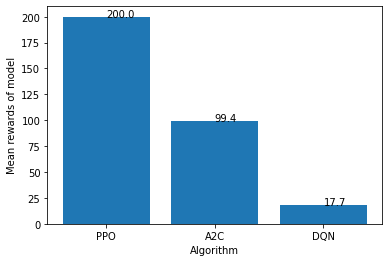

In [17]:
x=list(rewards.keys())
y=list(rewards.values())
plt.bar(range(len(x)),y,tick_label=x)
plt.xlabel("Algorithm")
plt.ylabel("Mean rewards of model")
addlabels(x,y)

In [18]:
del model
env.close()

### Testing

In [19]:
env_name='CartPole-v0'

In [20]:
rewards={}
for algo_name in algos:
    _,render_path,model_path=create_paths(algo_name, env_name)   
    print('******* Testing',algo_name,' *******')
    model_load_path=os.path.join(env_name,algo_name,"model.zip")
    model=eval(algo_name).load(model_load_path, env)
    _, total_rewards = run_experiment(env_name,env,render_path=render_path,random=False, episodes=5, model=model)
    env.close()
    rewards[algo_name]=total_rewards
env.close()

******* Testing PPO  *******
******* Testing A2C  *******
******* Testing DQN  *******


In [21]:
rewards

{'PPO': [200.0, 200.0, 200.0, 200.0, 200.0],
 'A2C': [90.0, 131.0, 95.0, 89.0, 116.0],
 'DQN': [15.0, 18.0, 19.0, 23.0, 13.0]}